# **Aditi Rao EXTC 118A2088**

1.	Download an image from the net.
2.	Read and display that image using opencv.
3.	Perform cropping, rotation, flipping operation on it.
4.	Display different channels of the image.
5.	Convert that image to gray scale image.
6.	Note the size and dimensions of the image.
7.     Draw a rectangle of Blue color of width 4.
8.	Perform negative, thresholding and adaptive thresholding on the grayscale image.
9.	Save the output images with their names. 

In [1]:
import cv2
from google.colab import files
uploaded=files.upload()

Saving sunflower.jpg to sunflower.jpg


In [37]:
from matplotlib import pyplot as plt

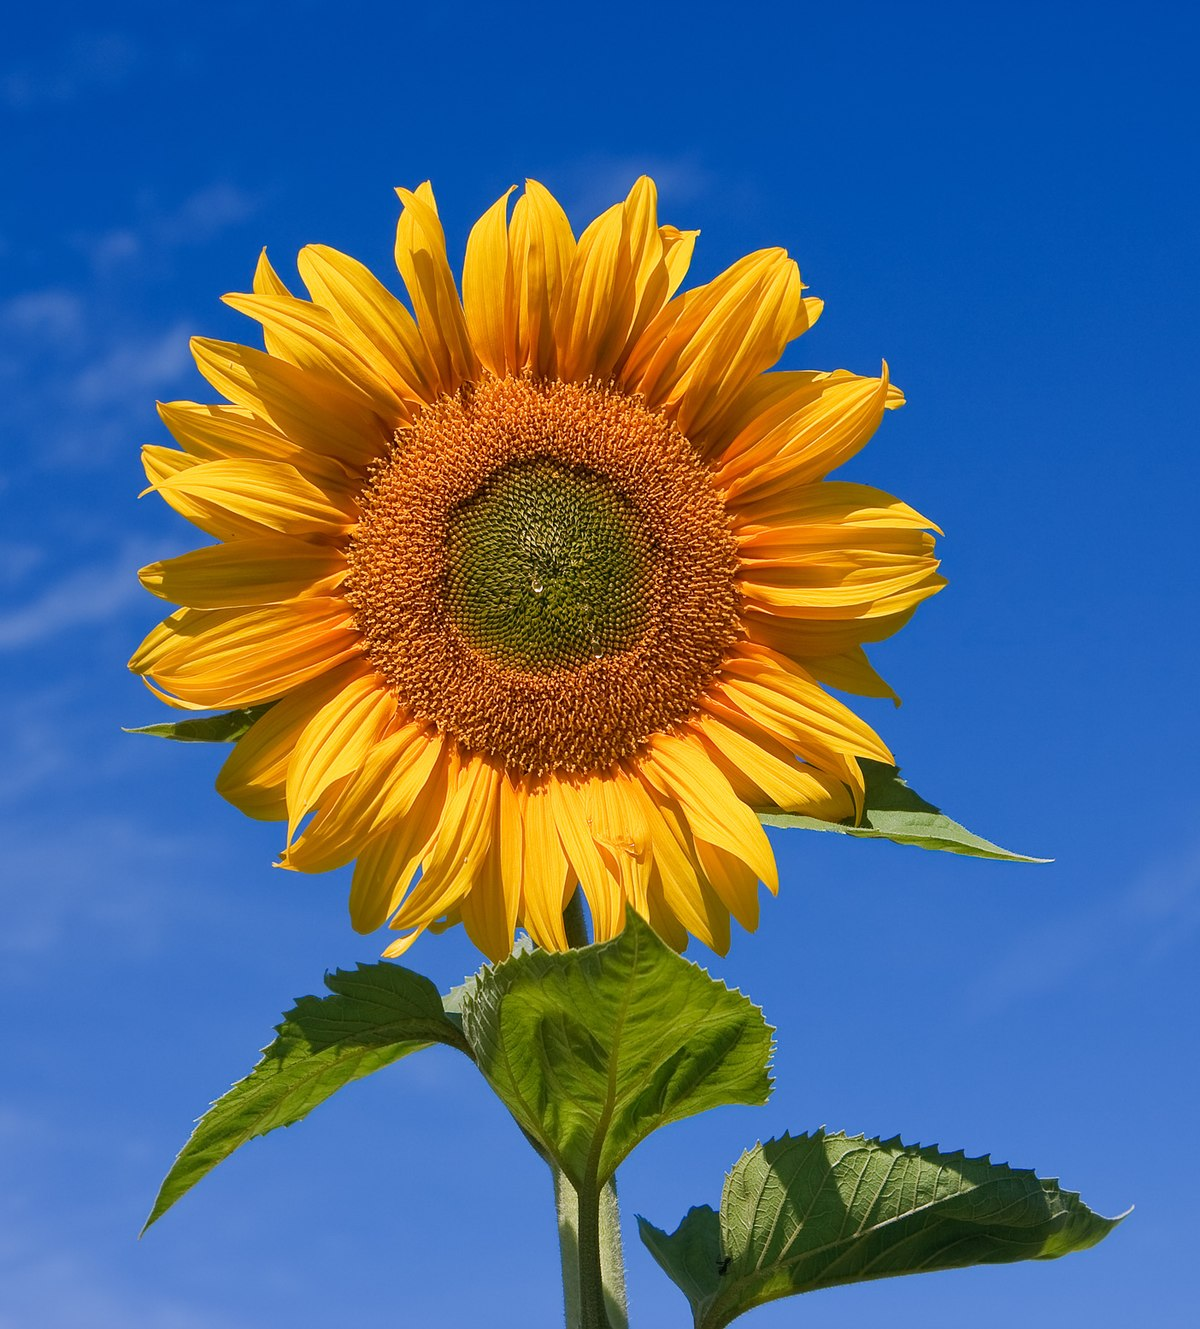

In [2]:
image = cv2.imread("sunflower.jpg")
from google.colab.patches import cv2_imshow
cv2_imshow(image)

# **CROP**

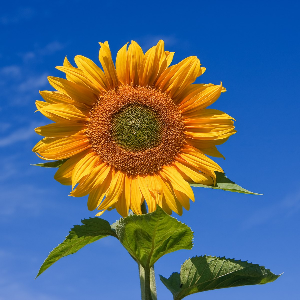

In [7]:
resized = cv2.resize(image, (300, 300))
cv2_imshow(resized)

Extract a 300x300 pixel square ROI (Region of Interest) from the input image 
START: (40,40)
END: (250, 220) 

image[startY:endY, startX:endX]

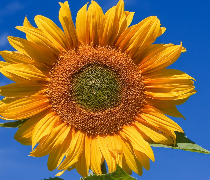

In [19]:
roi = resized[40:220, 40:250] 
cv2_imshow(roi)

# **ROTATION**

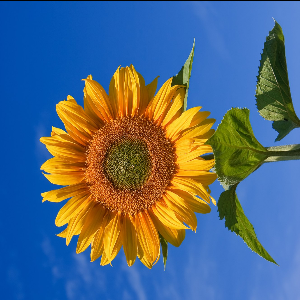

In [22]:
import imutils as im
rotated = im.rotate(resized, 90) 
cv2_imshow(rotated)

# **FLIP**

Original Image


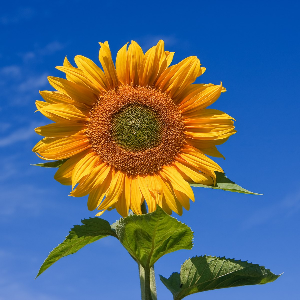

FLIP horizontally


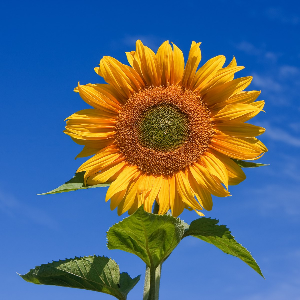

FLIP Vertically


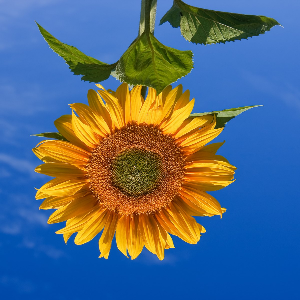

In [26]:
import numpy as np
img1=np.flipud(resized) # flip vertically

print("Original Image")
cv2_imshow(resized)

print("FLIP horizontally")
img2=np.fliplr(resized) #flip horizontally
cv2_imshow(img2)

print("FLIP Vertically")
cv2_imshow(img1)

# **Display different channels of the image.**

RED CHANNEL


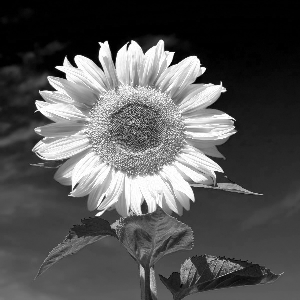

BLUE CHANNEL


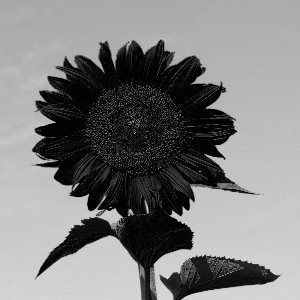

GREEN CHANNEL


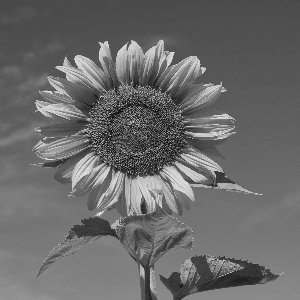

In [27]:
blue, green, red = cv2.split(resized) # Split the image into its channels
print("RED CHANNEL")
cv2_imshow(red) # Display the red channel in the image
print("BLUE CHANNEL")
cv2_imshow(blue) # Display the red channel in the image
print("GREEN CHANNEL")
cv2_imshow(green) # Display the red channel in the image

# **Convert that image to gray scale image.**

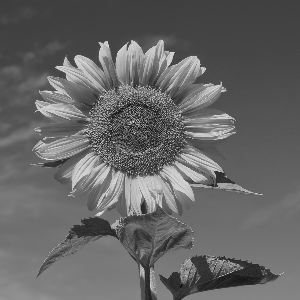

In [28]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# **Note the size and dimensions of the image.**

In [29]:
print("Image Properties")
print("- Number of Pixels: " + str(resized.size))
print("- Shape/Dimensions: " + str(resized.shape))
sz=resized.size
print("- Size={}".format(sz))
(h, w, d) = resized.shape
print("width={}, height={}, depth={}".format(w, h, d))

Image Properties
- Number of Pixels: 270000
- Shape/Dimensions: (300, 300, 3)
- Size=270000
width=300, height=300, depth=3


# **Draw a rectangle of Blue color of width 4.**
  Syntax: cv2.rectangle(image, start_point, end_point, color, thickness)

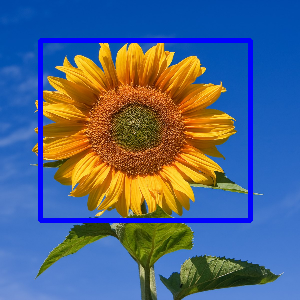

In [31]:
output = resized.copy()
cv2.rectangle(output, (40, 40), (250,220), (255, 0, 0), 4) #START: (40,40) END: (250, 220) 
cv2_imshow(output)

# **Perform negative, thresholding and adaptive thresholding on the grayscale image.**

Grayscale Image


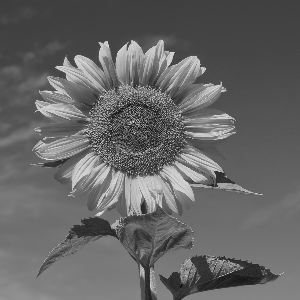

Digital Negative


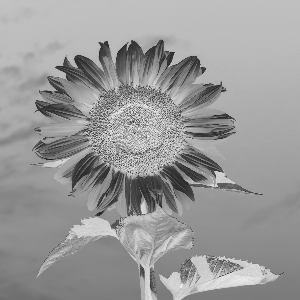

Thresholding


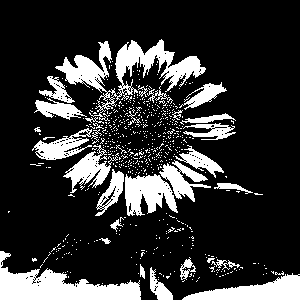

In [39]:
print('Grayscale Image')
cv2_imshow(gray)

#Performing Digital Negative 
max_intensity = 255
(h, w) = gray.shape
output = gray.copy()
for i in np.arange(h):
  for j in np.arange(w):
    a = output.item(i,j)
    b = max_intensity - a
    output.itemset((i,j), b)
print("Digital Negative")
cv2_imshow(output)

# Perform binary thresholding on the image with T = 125
#cv2.threshold: 
#First argument - the source image, which should be a grayscale image. 
#Second argument - the threshold value which is used to classify the pixel values. 
#Third argument - the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value
ret,thresh1 = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)
print("Thresholding")
cv2_imshow(thresh1)

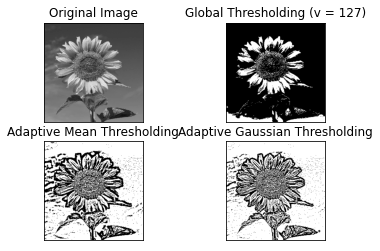

In [40]:
#ADAPTIVE THRESHOLD
ret,th1 = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [gray, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()